In [ ]:
%pip install opencv-python tensorflow

In [ ]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model


In [12]:
from glob import glob
from cv2 import cvtColor, imread, COLOR_BGR2RGB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [13]:
train_path=r'Data/train'
test_path=r'Data/test'

In [15]:
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = imread(file)
        img_array = cvtColor(img_array, COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})


100%|██████████| 9999/9999 [03:00<00:00, 55.36it/s]


In [16]:
data.shape

(22564, 2)

In [17]:
data.head()

,image,label
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",train\O
1,"[[[241, 242, 247], [241, 242, 247], [241, 242,...",train\O
2,"[[[224, 224, 224], [229, 229, 229], [236, 236,...",train\O
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",train\O
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",train\O


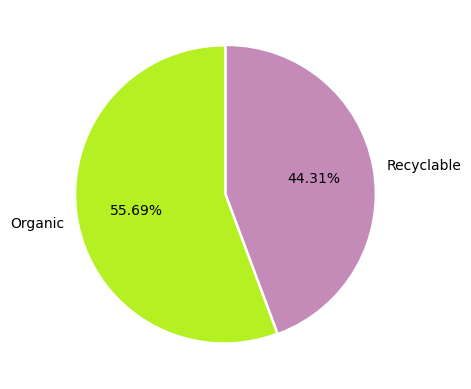

In [24]:
colors = ['#ae0d', '#c48bb8']
plt.pie(data.label.value_counts(),
        labels=['Organic', 'Recyclable'],
        autopct='%0.2f%%',
        colors=colors,
        startangle=90,
        explode=[0.009, 0.009])
plt.show()